# Working with Images

The `henrietta` package contains some tools for reading images from a variety of file formats, displaying images, and making some very simple image analyses. This page summarizes the use of some of those tools.

In [1]:
import henrietta as hsl
import matplotlib.pyplot as plt

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


## Reading and Writing Images
Astronomers often store images as FITS files. Less nerdy humans often store images as JPGs, PNGs, or GIFs. Ideally, we'd like to be able to play with all of these on equal footing. First, we can read an image in as a grayscale:

In [2]:
gray = hsl.read_gray('_static/rainbow.jpg')
print('The "gray" image is a {}, with shape of {}.'.format(type(gray), gray.shape))

read a (1041, 1280) grayscale image from _static/rainbow.jpg
The "gray" image is a <class 'numpy.ndarray'>, with shape of (1041, 1280).


That command read the image file in as a single image, with one number for the brightness of each pixel. Many images are in color. That means they actually contain three independent images inside them, one each for red, green, and blue. We can read these three separate images with the following:

In [3]:
r, g, b = hsl.read_rgb('_static/rainbow.jpg')
print('The "r" image is a {}, with shape of {}.'.format(type(r), r.shape))
print('The "g" image is a {}, with shape of {}.'.format(type(g), r.shape))
print('The "b" image is a {}, with shape of {}.'.format(type(b), r.shape))

read a (1041, 1280, 3) RGB image from _static/rainbow.jpg
The "r" image is a <class 'numpy.ndarray'>, with shape of (1041, 1280).
The "g" image is a <class 'numpy.ndarray'>, with shape of (1041, 1280).
The "b" image is a <class 'numpy.ndarray'>, with shape of (1041, 1280).


There's also a simple wrapper to load in FITS images in a similar way:

In [4]:
anothergray = hsl.read_fits('_static/rainbow.fits')
print('The "anothergray" image is a {}, with shape of {}.'.format(type(anothergray), anothergray.shape))

read a (1041, 1280) grayscale image from _static/rainbow.fits
The "anothergray" image is a <class 'numpy.ndarray'>, with shape of (1041, 1280).


If we have an array, we can save it out to an image file too. The `write_image` function will do a pretty good job of figuring out the right way to save the image, based on the file extension you give it. For example, it will try to save as a JPG if your filename is `image.jpg`; it will try to save as a FITS if your filename is `something.fits`.

In [ ]:
hsl.write_image(gray, filename='test.jpg')

In [ ]:
hsl.write_image(gray, filename='test.fits')

If we want to save as a color image, we have to compile three images into one file with the right shape. `compile_rgb` is a simple tool to help with that.

In [ ]:
rgb = hsl.compile_rgb(r, g, b)
hsl.write_image(rgb, filename='colorful-test.png')

Being able to read and write images is a nice way to connect analyses you do in Python of collecting data (for example, taking a picture!) and with ways of sharing and visualizing imaging data.

## Displaying Images
Images are simply two-dimensional arrays of numbers, with a value associated with each pixel. The `plt.imshow` function is great for displaying this kind of data, as shown in the following examples.

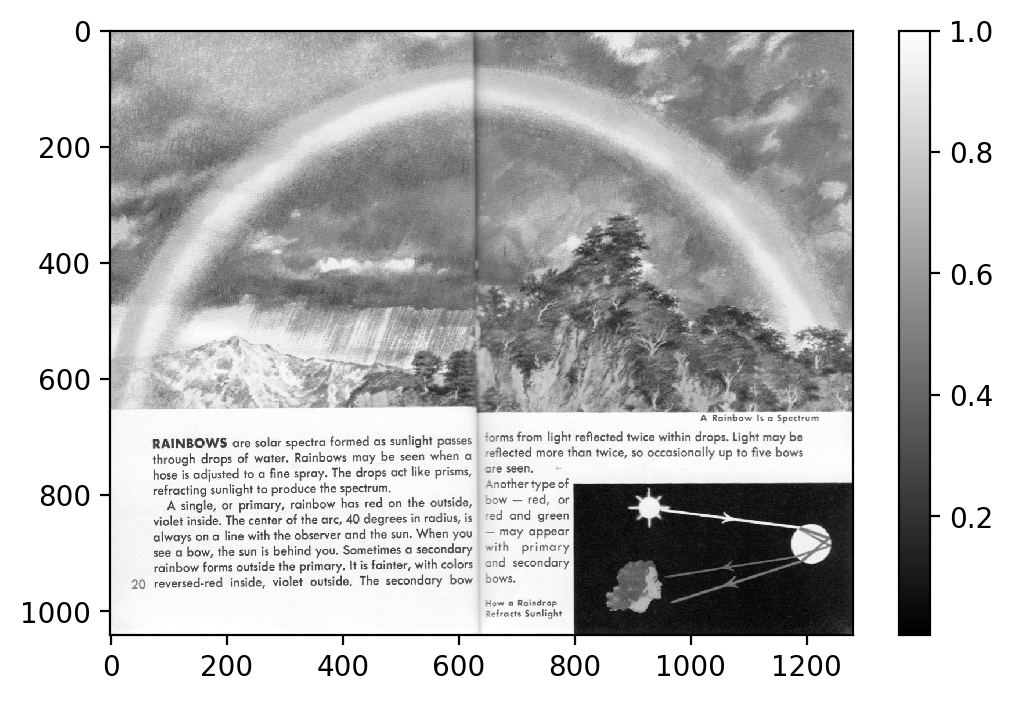

In [5]:
plt.figure(dpi=200)
plt.imshow(gray, cmap='gray')
plt.colorbar();

We can display each of the red, green, and blue images in the same way.

In [ ]:
plt.figure(dpi=200)
plt.imshow(r, cmap='gray')
plt.title('(just the red)')
plt.colorbar();

In [ ]:
plt.figure(dpi=200)
plt.imshow(g, cmap='gray')
plt.title('(just the green)')
plt.colorbar();

In [ ]:
plt.figure(dpi=200)
plt.imshow(b, cmap='gray')
plt.title('(just the blue)')
plt.colorbar();

With these independent channels, we can combine the brightness in each of three colors into a single color image. The `display_rgb` function is designed to show how that process works.

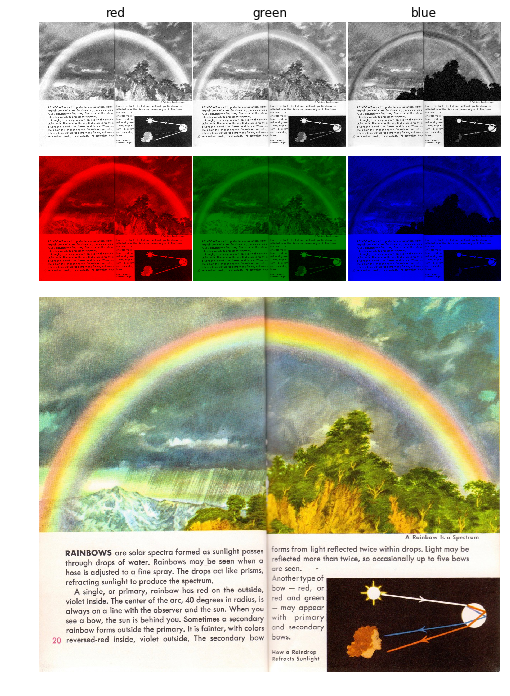

In [6]:
hsl.display_rgb(r, g, b)

The top panels show the brightness in each of the RGB channels as a simple grayscale. The middle panels show what those monochromatic images would look like if projected in red, green, or blue light. The bottom panel shows what we get when we superpose the three RGB color images, combining the contributions of each to each pixel. (I wonder what a rainbow looks like without the red light...)

## Analyzing an Image
One of the basic questions we might ask about an image is "How bright is that thing in it?" We can see that visually by looking at the brightness of pixels by eye, but what if we wanted to combine all the light from a single object into one number? The simplest way to do that would be to sum all its pixels together. The `Loupe` tool provides a simple way to do this "aperture photometry" on an image. 

In [7]:
%matplotlib notebook
import henrietta as hsl

In [8]:
# create a test image
stars = hsl.simulate_image('GJ 1132', pixelscale=2.0)

SELECT source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',153.71574311399957,-47.15671937038528,0.035355339059327376))=1 and phot_g_mean_mag < 20
querying Gaia DR2, centered on <SkyCoord (ICRS): (ra, dec) in deg
    (153.71574311, -47.15671937)> with radius 127.27922061357854 arcsec, for G<20


In the above cell, we made a simulated image. Below, we'll run an interactive tool to measure the total brightness integrated over circular apertures. To measure the brightness of your star, hover your mouse over the star, and press `a` on the keyboard, to `a`dd an `a`perture. If you don't like where it is, you can `z`ap that aperture by pressing `z`.

<IPython.core.display.Javascript object>


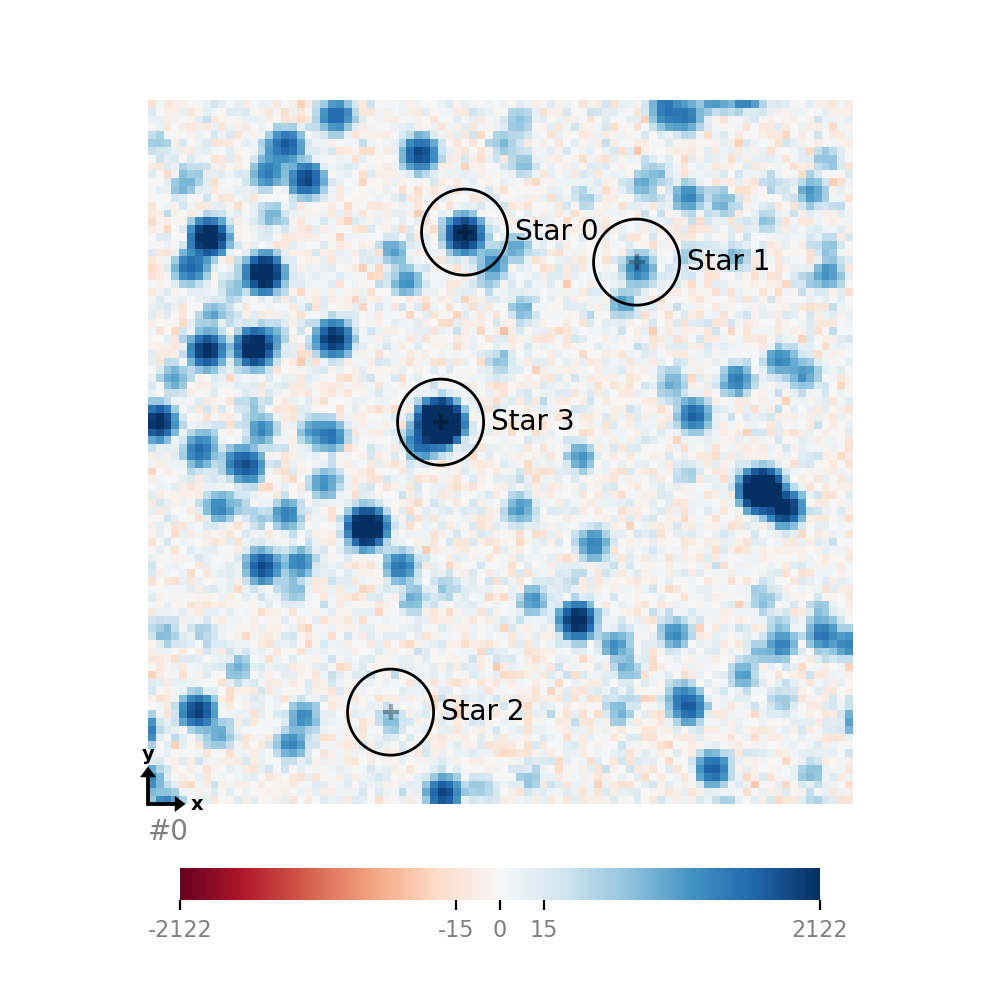

Please [a]dd or [z]ap an aperture at the cursor location.


In [12]:
p = hsl.Loupe(stars)

You can then access out a table of all the results through the loupe's `measurements` attribute.

In [ ]:
p.measurements

Play around! We may keep adding some bells and whistles to this tool, but the general interface will likely stay generally similar.